# Bounding Box Object detection

### The task in here is to build an ML algorithm that will be trained on identifyinh the bounding box for the twitter following buttons. The end output would return the images with the bounding box and the cordinates for the box. 

### The steps followed are as shown below:
- I have used the retinanet for object detection. To use this network, I have cloned the notebook with Fizyr github account.
- Installed certain packages that I required for the running the retinanet model.
- Dataset preparation and image labelling
- Model training
- Model prediction



In [ ]:
cd '/Users/Sujatha/Desktop/Twitter'

In [1]:
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import urllib.request
import os
from PIL import Image

### Git cloning with fizyr account and installing needed packages

In [4]:
!git clone https://github.com/fizyr/keras-retinanet.git

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 85, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 5705 (delta 28), reused 38 (delta 15), pack-reused 5620
Receiving objects: 100% (5705/5705), 14.07 MiB | 20.95 MiB/s, done.
Resolving deltas: 100% (3798/3798), done.


In [5]:
conda install -c conda-forge fbprophet

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/Sujatha/opt/anaconda3

  added / updated specs:
    - fbprophet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.9.11          |           py37_0         147 KB  conda-forge
    conda-4.8.3                |   py37hc8dfbb8_1         3.0 MB  conda-forge
    ephem-3.7.7.1              |   py37h0b31af3_0         755 KB  conda-forge
    fbprophet-0.5              |   py37h6de7cb9_0         631 KB  conda-forge
    pystan-2.17.1.0       

In [6]:
%cd keras-retinanet/

!pip install .

/Users/Sujatha/Desktop/Twitter/keras-retinanet
Processing /Users/Sujatha/Desktop/Twitter/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp37-cp37m-macosx_10_9_x86_64.whl size=126210 sha256=2b5134d3a62293b5a1b993794c089b7bfbb6d46bfad2cc5d2f15c4597b3e4678
  Stored in directory: /Users/Sujatha/Library/Caches/pip/wheels/2e/10/a6/7614363e042becde972242b64a1c2bff42095d7a5f53f1f712
Successfully built keras-retinanet
  Attempting uninstall: keras-retinanet
    Found existing installation: keras-retinanet 0.5.1
    Uninstalling keras-retinanet-0.5.1:
      Successfully uninstalled keras-retinanet-0.5.1
You should consider upgrading via the '/Users/Sujatha/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [7]:
!python setup.py build_ext --inplace

running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils/compute_overlap.c
/Users/Sujatha/opt/anaconda3/lib/python3.7/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /Users/Sujatha/Desktop/Twitter/keras-retinanet/keras_retinanet/utils/compute_overlap.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'keras_retinanet.utils.compute_overlap' extension
creating build
creating build/temp.macosx-10.9-x86_64-3.7
creating build/temp.macosx-10.9-x86_64-3.7/keras_retinanet
creating build/temp.macosx-10.9-x86_64-3.7/keras_retinanet/utils
gcc -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -I/Users/Sujatha/opt/anaconda3/include -arch x86_64 -I/Users/Sujatha/opt/anaconda3/include -arch x86_64 -I/Users/Sujatha/opt/anaconda3/include/python3.7m -I/Users/Sujatha/opt/anaconda3/lib

### Dataset preparation and manual labelling

In [8]:
lable_box1 = [1030, 115, 1272, 175]
lable_box2 = [1030, 311 , 1272,387]
lable_box3 = [1030, 485 , 1272, 553]
lable_box4 = [1030, 616 , 1272, 683 ]
lable_box5 = [1030, 823 , 1272, 886]
lable_box6 = [1030,1065 , 1272, 1132 ]
lable_box7 = [1030, 1268 , 1272, 1335 ]
lable_box8 = [1030, 1471, 1272, 1538 ]
lable_box9 = [1030, 1678 , 1272, 1741 ]

lable1_box1 = [1030, 50.5, 1272, 122]
lable1_box2 = [1030, 256 , 1272,338]
lable1_box3 = [1030, 424 , 1272, 496]
lable1_box4 = [1030, 669 , 1272, 731 ]
lable1_box5 = [1030, 880 , 1272, 947]
lable1_box6 = [1030,1043 , 1272, 1132 ]
lable1_box7 = [1030, 1245 , 1272, 1335 ]
lable1_box8 = [1030, 1485, 1272, 1566 ]

lable2_box1 = [1030, 76, 1272, 150]
lable2_box2 = [1030, 256 , 1272,323]
lable2_box3 = [1030, 447 , 1272, 531]
lable2_box4 = [1030, 607 , 1272, 695 ]
lable2_box5 = [1030, 822 , 1272, 905]
lable2_box6 = [1030,1043 , 1272, 1099 ]
lable2_box7 = [1030, 1245 , 1272, 1304 ]
lable2_box8 = [1030, 1405, 1272, 1474 ]

lable3_box1 = [1082, 118 , 1300,181]
lable3_box2 = [1082, 366 , 1300, 420]
lable3_box3 = [1082, 611 , 1300, 674 ]
lable3_box4 = [1082, 761 , 1300, 833]
lable3_box5 = [1082,968 , 1300, 1039 ]
lable3_box6 = [1082, 1180 , 1300, 1237 ]
lable3_box7 = [1082, 1383, 1300, 1446 ]

box_0 = np.array([lable_box1, lable_box2, lable_box3, lable_box4, lable_box5, lable_box6, lable_box7, lable_box8, lable_box9]).astype(int)
box_1 = np.array([lable1_box1, lable1_box2, lable1_box3, lable1_box4, lable1_box5, lable1_box6, lable1_box7, lable1_box8]).astype(int)
box_2 = np.array([lable2_box1, lable2_box2, lable2_box3, lable2_box3, lable2_box4, lable2_box5, lable2_box6, lable2_box7, lable2_box8]).astype(int)
box_3 = np.array([lable3_box1, lable3_box2, lable3_box3, lable3_box4, lable3_box5, lable3_box6, lable3_box6, lable3_box7]).astype(int)
ids = np.ones((9), dtype=int)
class_name = np.repeat('tab', 9)

In [14]:
dataset = dict()
dataset['image_name'] = list()
dataset['x_min'] = list()
dataset["y_min"] = list()
dataset["x_max"] = list()
dataset["y_max"] = list()
dataset["class_name"] = list()
    

for i in range(9):    
    j =0    
    box = box_0 
    try:           
        img = Image.open("/Users/Sujatha/Desktop/Twitter/Screen_Shot_2019-10-24_at_7.00.07_PM.png")
        img = img.convert('RGB')
        img.save(f'screenshot_1.jpeg', "JPEG")
        dataset['image_name'].append(f'screenshot_1.jpeg')
        dataset['x_min'].append(box[i][0])       
        dataset["y_min"].append(box[i][1])        
        dataset["x_max"].append(box[i][2])        
        dataset["y_max"].append(box[i][3])        
        dataset["class_name"].append(class_name[i])
    except(ValueError, IndexError):            
            pass


for i in range(8):    
    j =1    
    box = box_1    
    try: 
        img = Image.open("/Users/Sujatha/Desktop/Twitter/Screen_Shot_2019-10-24_at_7.00.36_PM.png")
        img = img.convert('RGB')
        img.save(f'screenshot_2.jpeg', "JPEG")
        dataset['image_name'].append(f'screenshot_2.jpeg')        
        dataset['x_min'].append(box[i][0])       
        dataset["y_min"].append(box[i][1])        
        dataset["x_max"].append(box[i][2])        
        dataset["y_max"].append(box[i][3])        
        dataset["class_name"].append(class_name[i])    
    except(ValueError, IndexError):       
        pass

for i in range(8):    
    j =2    
    box = box_2    
    try:
        img = Image.open("/Users/Sujatha/Desktop/Twitter/Screen_Shot_2019-10-24_at_7.00.21_PM.png")
        img = img.convert('RGB')
        img.save(f'screenshot_3.jpeg', "JPEG")
        dataset['image_name'].append(f'screenshot_3.jpeg') 
        dataset['x_min'].append(box[i][0])       
        dataset["y_min"].append(box[i][1])        
        dataset["x_max"].append(box[i][2])        
        dataset["y_max"].append(box[i][3])        
        dataset["class_name"].append(class_name[i])    
    except(ValueError, IndexError):       
        pass

for i in range(7):    
    j =3    
    box = box_3    
    try:  
        img = Image.open("/Users/Sujatha/Desktop/Twitter/Screen_Shot_2019-10-24_at_7.00.32_PM.png")
        img = img.convert('RGB')
        img.save(f'screenshot_4.jpeg', "JPEG")
        dataset['image_name'].append(f'screenshot_4.jpeg') 
        dataset['x_min'].append(box[i][0])       
        dataset["y_min"].append(box[i][1])        
        dataset["x_max"].append(box[i][2])        
        dataset["y_max"].append(box[i][3])        
        dataset["class_name"].append(class_name[i])    
    except(ValueError, IndexError):       
        pass 

df = pd.DataFrame(dataset)

In [15]:
df

,image_name,x_min,y_min,x_max,y_max,class_name
0,screenshot_1.jpeg,1030,115,1272,175,tab
1,screenshot_1.jpeg,1030,311,1272,387,tab
2,screenshot_1.jpeg,1030,485,1272,553,tab
3,screenshot_1.jpeg,1030,616,1272,683,tab
4,screenshot_1.jpeg,1030,823,1272,886,tab
5,screenshot_1.jpeg,1030,1065,1272,1132,tab
6,screenshot_1.jpeg,1030,1268,1272,1335,tab
7,screenshot_1.jpeg,1030,1471,1272,1538,tab
8,screenshot_1.jpeg,1030,1678,1272,1741,tab
9,screenshot_2.jpeg,1030,50,1272,122,tab


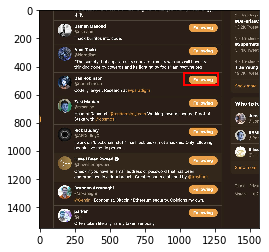

In [16]:
# Loading the dataframe image with bounding box
def bbox_to_rect(image_row):    
    img = cv2.imread(image_row.image_name)    
    bbox = [        
        image_row.x_min, image_row.y_min, image_row.x_max, image_row.y_max    
    ]    
    box = plt.Rectangle(        
        xy=(bbox[0], bbox[1]), width=bbox[2] - bbox[0], height=bbox[3] - bbox[1],        
        fill=False, edgecolor='red', linewidth=2)    
    fig = plt.imshow(img)    
    fig.axes.add_patch(box);

bbox_to_rect(df.iloc[20])

# Model training

In [17]:
## test and train split
train_df, test_df = train_test_split(df,test_size=0.05,random_state=42)
ANNOTATIONS_FILE = 'annotations.csv'
CLASSES_FILE = 'classes.csv'

train_df.to_csv(ANNOTATIONS_FILE, index=False, header=None)
classes = {'tab'}

with open(CLASSES_FILE, 'w') as f: 
    for i, line in enumerate(sorted(classes)):    
        f.write('{},{}\n'.format(line,i))

In [18]:
# Training
os.makedirs("model", exist_ok=True)
PRETRAINED_MODEL = './model/_pretrained_model.h5'

URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
urllib.request.urlretrieve(URL_MODEL, PRETRAINED_MODEL)

print('Downloaded pretrained model to ' + PRETRAINED_MODEL)

Downloaded pretrained model to ./model/_pretrained_model.h5


In [80]:
!keras_retinanet/bin/train.py --freeze-backbone --random-transform --weights {PRETRAINED_MODEL} --batch-size 3 --steps 15 --epochs 10 csv annotations.csv classes.csv

Using TensorFlow backend.
Creating model, this may take a second...
2020-05-02 22:41:43.186283: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-05-02 22:41:43.256153: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f82e0547dd0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-05-02 22:41:43.256201: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
/Users/Sujatha/opt/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:1319: UserWarning: Skipping loading of weights for layer classification_submodel due to mismatch in shape ((3, 3, 256, 9) vs (720, 256, 3, 3)).
  weight_values[i].shape))
/Users/Sujatha/opt/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:1319: UserWarning: Skipping loading of weights for layer classification_submodel due to mismatch in shape

Epoch 1/10
15/15 [==============================] - 1259s 84s/step - loss: 2.6152 - regression_loss: 1.4641 - classification_loss: 1.1511

Epoch 00001: saving model to ./snapshots/resnet50_csv_01.h5
Epoch 2/10
15/15 [==============================] - 946s 63s/step - loss: 2.5663 - regression_loss: 1.4432 - classification_loss: 1.1231

Epoch 00002: saving model to ./snapshots/resnet50_csv_02.h5
Epoch 3/10
15/15 [==============================] - 1197s 80s/step - loss: 2.3312 - regression_loss: 1.2427 - classification_loss: 1.0886

Epoch 00003: saving model to ./snapshots/resnet50_csv_03.h5
Epoch 4/10
15/15 [==============================] - 980s 65s/step - loss: 2.2764 - regression_loss: 1.2278 - classification_loss: 1.0486

Epoch 00004: saving model to ./snapshots/resnet50_csv_04.h5
Epoch 5/10
15/15 [==============================] - 1014s 68s/step - loss: 2.1499 - regression_loss: 1.1604 - classification_loss: 0.9895

Epoch 00005: saving model to ./snapshots/resnet50_csv_05.h5
Epoch 6

In [81]:
!ls snapshots

resnet50_csv_01.h5 resnet50_csv_04.h5 resnet50_csv_07.h5 resnet50_csv_10.h5
resnet50_csv_02.h5 resnet50_csv_05.h5 resnet50_csv_08.h5
resnet50_csv_03.h5 resnet50_csv_06.h5 resnet50_csv_09.h5


In [21]:
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# Load the trained model

In [82]:
model_path = os.path.join('snapshots', sorted(os.listdir('snapshots'), reverse=True)[0])
print(model_path)

model = models.load_model(model_path, backbone_name='resnet50')
model = models.convert_model(model)

labels_to_names = pd.read_csv(CLASSES_FILE, header=None).T.loc[0].to_dict()

snapshots/resnet50_csv_10.h5
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-22.627417, -11.313708,  22.627417,  11.313708],
       [-28.50876 , -14.25438 ,  28.50876 ,  14.25438 ],
       [-35.918785, -17.959393,  35.918785,  17.959393],
       [-16.      , -16.      ,  16.      ,  16.      ],
       [-20.158737, -20.158737,  20.158737,  20.158737],
       [-25.398417, -25.398417,  25.398417,  25.398417],
       [-11.313708, -22.627417,  11.313708,  22.627417],
       [-14.25438 , -28.50876 ,  14.25438 ,  28.50876 ],
       [-17.959393, -35.918785,  17.959393,  35.918785]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-45.254833, -22.627417,  45.254833,  22.627417],
       [-57.01752 , -28.50876 ,  57.01752 ,  28.50876 ],
       [-71.83757 , -35.918785,  71.83757 ,  35.918785],
       [-32.      , -32.      ,  32.      ,  32.      ],
       [-40.317474, -40.317474,  40.317474,  40.317474],
       [

# Prediction using the validation image

In [100]:
def predict(image):
  image = preprocess_image(image.copy())
  image, scale = resize_image(image)

  boxes, scores, labels = model.predict_on_batch(
    np.expand_dims(image, axis=0)
  )

  boxes /= scale

  return boxes, scores, labels

In [101]:
THRES_SCORE = 0.4

def draw_detections(image, boxes, scores, labels):
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
    if score < THRES_SCORE:
        break

    color = label_color(label)
    print(box)

    b = box.astype(int)
    draw_box(image, b, color=color)

    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(image, b, caption)

In [102]:
def show_detected_objects(image_row):
  img_path = image_row.image_name
  
  image = read_image_bgr(img_path)

  boxes, scores, labels = predict(image)

  draw = image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

  draw_detections(draw, boxes, scores, labels)

  plt.axis('off')
  plt.imshow(draw)
  plt.show()
  

In [103]:
test = dict()
test['image_name'] = list()
test_img = Image.open("/Users/Sujatha/Desktop/Twitter/Screen_Shot_2019-10-24_at_7.00.16_PM.png")
test_img = img.convert('RGB')
test_img.save(f'test_image.jpeg', "JPEG")
test['image_name'].append(f'screenshot_4.jpeg')
test_df_1 = pd.DataFrame(test)

[1070.0068 1173.1187 1310.2062 1247.3499]
[1069.6558   356.94778 1317.3756   444.94403]
[1065.9156 1375.2843 1316.0402 1452.2738]
[1069.6943  601.1321 1314.8788  683.3967]
[1068.1078  973.5773 1318.9489 1055.5134]
[1069.189    119.64514 1318.4701   204.55522]
[1077.1235   761.60846 1309.8365   835.5449 ]


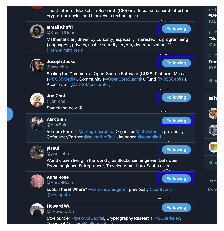

In [104]:
show_detected_objects(test_df_1.iloc[0])